In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#data
X = np.array([10,9,2,15,10,16,11])
X = np.reshape(X,(-1,1))
y = np.array([95,80,10,50,45,98,38])

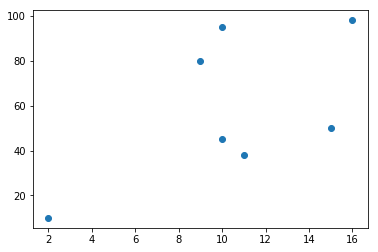

In [3]:
#Scatter plot
plt.scatter(X,y)

In [4]:
from sklearn.linear_model import LinearRegression
sklearn_regressor = LinearRegression().fit(X, y)

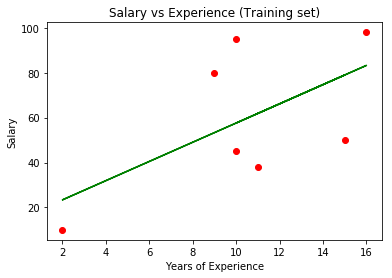

In [5]:
plt.scatter(X, y, color = 'red')
plt.plot(X, sklearn_regressor.predict(X), color = 'green')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [6]:
#my Class
class LinearRegression():
    def __init__(self, X, y, alpha=0.03, n_iter=150):

        self.alpha = alpha
        self.n_iter = n_iter
        self.n_samples = len(y)
        self.n_features = np.size(X, 1)
        self.X = np.hstack((np.ones(
            (self.n_samples, 1)), (X - np.mean(X, 0)) / np.std(X, 0)))
        self.y = y[:, np.newaxis]
        self.params = np.zeros((self.n_features + 1, 1))
        self.coef_ = None
        self.intercept_ = None

    def fit(self):

        for i in range(self.n_iter):
            self.params = self.params - (self.alpha/self.n_samples) * \
            self.X.T @ (self.X @ self.params - self.y)

        self.intercept_ = self.params[0]
        self.coef_ = self.params[1:]

        return self

    def score(self, X=None, y=None):

        if X is None:
            X = self.X
        else:
            n_samples = np.size(X, 0)
            X = np.hstack((np.ones(
                (n_samples, 1)), (X - np.mean(X, 0)) / np.std(X, 0)))

        if y is None:
            y = self.y
        else:
            y = y[:, np.newaxis]

        y_pred = X @ self.params
        score = 1 - (((y - y_pred)**2).sum() / ((y - y.mean())**2).sum())

        return score

    def predict(self, X):
        n_samples = np.size(X, 0)
        y = np.hstack((np.ones((n_samples, 1)), (X-np.mean(X, 0)) \
                            / np.std(X, 0))) @ self.params
        return y

    def get_params(self):

        return self.params

In [7]:
regressor = LinearRegression(X,y).fit()

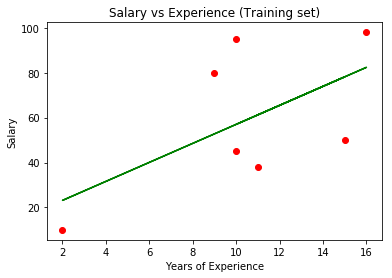

In [8]:
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'green')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [9]:
regressor.score(X)

0.3602804184755536